# Algorithm Comparison For Student Performance

Rebuild from this repository [link](https://github.com/ashishT1712/Data-Mining-Student-Performance)

The comparison is between:
* Single Vector Machine (SVM)
* Naive Bayes Classifier (NB)
* K-Nearest-Neighbors (KNN)
* Decision Tree (DT)


The dataset is from [link](http://archive.ics.uci.edu/ml/datasets/student+performance)

It comes from [this paper](http://www3.dsi.uminho.pt/pcortez/student.pdf)

## Modules

In [1]:
import sklearn.metrics
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Dataset

In [2]:
url = "https://raw.githubusercontent.com/ashishT1712/Data-Mining-Student-Performance/master/datat.csv"

df = pd.read_csv(url)

In [3]:
df.head()

,sex,age,Medu,Fedu,studytime,failures,famrel,freetime,health,absences,address,guardian,G3
0,F,18,4,4,2,0,4,3,3,6,U,mother,6
1,F,17,1,1,2,0,5,3,3,4,U,father,6
2,F,15,1,1,2,3,4,3,3,10,U,mother,10
3,F,15,4,2,3,0,3,2,5,2,U,mother,15
4,F,16,3,3,2,0,4,3,5,4,U,father,10


## SVM

In [4]:
from sklearn import svm

In [5]:
df_svm = df.copy()

In [6]:
df_svm['sex'] = df_svm['sex'].map({'M':0, 'F':1})
df_svm['address'] = df_svm['address'].map({'U':0, 'R':1})
df_svm['guardian'] = df_svm['guardian'].map({'mother':0, 'father':1})

In [7]:
X_svm = df_svm.values[:, 0:11]
y_svm = df_svm.values[:, 12]

In [8]:
X_svm_train, X_svm_test, y_svm_train, y_svm_test = train_test_split(X_svm, y_svm, test_size=0.3)

In [9]:
svm_model = svm.SVC(kernel='rbf', C=1000, gamma=1000)

svm_model.fit(X_svm_train, y_svm_train)

SVC(C=1000, gamma=1000)

In [10]:
svm_predict = svm_model.predict(X_svm_test)

In [11]:
svm_accuracy = accuracy_score(y_svm_test, svm_predict, normalize=True)
svm_error_rate = 1 - accuracy_score(y_svm_test, svm_predict, normalize=True)
svm_sensitivity = sklearn.metrics.recall_score(y_svm_test, svm_predict, labels=None, average='micro', sample_weight=None)
svm_specificity =  1 - sklearn.metrics.recall_score(y_svm_test, svm_predict, labels=None, average='micro', sample_weight=None)

# Accuracy
print("Accuarcy\t:", svm_accuracy)
# Classification Error
print("Error Error\t:", svm_error_rate)
# Sensitivity
print('Sensitivity\t:', svm_sensitivity)
# Specificity
print('Specificity\t:', svm_specificity)

Accuarcy	: 0.7468354430379747
Error Error	: 0.25316455696202533
Sensitivity	: 0.7468354430379747
Specificity	: 0.25316455696202533


## KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [13]:
df_knn = df.copy()

In [14]:
df_knn['sex'] = df_knn['sex'].map({'M':0, 'F':1})
df_knn['address'] = df_knn['address'].map({'U':0, 'R':1})
df_knn['guardian'] = df_knn['guardian'].map({'mother':0, 'father':1})

In [15]:
X_knn = df_knn.values[:, 0:11]
y_knn = df_knn.values[:, 12]

In [16]:
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(X_knn, y_knn, test_size=0.3)

In [17]:
print(X_knn_train.shape)
print(X_knn_test.shape)
print(y_knn_train.shape)
print(y_knn_test.shape)

(553, 11)
(237, 11)
(553,)
(237,)


In [18]:
knn_model = KNeighborsClassifier(n_neighbors=1, weights='uniform', algorithm='auto')
knn_model.fit(X_knn_train, y_knn_train)
knn_predict = knn_model.predict(X_knn_test)

In [19]:
knn_accuracy = accuracy_score(y_knn_test, knn_predict, normalize=True)
knn_error_rate = 1 - accuracy_score(y_knn_test, knn_predict, normalize=True)
knn_sensitivity = sklearn.metrics.recall_score(y_knn_test, knn_predict, labels=None, average='micro', sample_weight=None)
knn_specificity =  1 - sklearn.metrics.recall_score(y_knn_test, knn_predict, labels=None, average='micro', sample_weight=None)

# Accuracy
print("Accuarcy\t:", knn_accuracy)
# Classification Error
print("Error Error\t:", knn_error_rate)
# Sensitivity
print('Sensitivity\t:', knn_sensitivity)
# Specificity
print('Specificity\t:', knn_specificity)

Accuarcy	: 0.7383966244725738
Error Error	: 0.2616033755274262
Sensitivity	: 0.7383966244725738
Specificity	: 0.2616033755274262


## NB

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [21]:
df_nb = df.copy()

In [22]:
df_nb_rev = df_nb

In [23]:
le = preprocessing.LabelEncoder()

sex_cat = le.fit_transform(df_nb.sex)
address_cat = le.fit_transform(df_nb.address)
guardian_cat = le.fit_transform(df_nb.guardian)

df_nb_rev['sex_cat'] = sex_cat
df_nb_rev['address_cat'] = address_cat
df_nb_rev['guardian_cat'] = guardian_cat

In [24]:
dummy_fields = ['sex', 'address', 'guardian']
df_nb_rev = df_nb_rev.drop(dummy_fields, axis=1)

In [25]:
df_nb_rev = df_nb_rev.reindex(['sex_cat', 'age', 'Medu', 'Fedu', 'studytime', 'failures', 'famrel',
       'freetime', 'health', 'absences', 'address_cat', 'guardian_cat', 'G3'], axis=1)

In [26]:
X_nb = df_nb_rev.values[:, :11]
y_nb = df_nb_rev.values[:, 11]

X_nb_train, X_nb_test, y_nb_train, y_nb_test = train_test_split(X_nb, y_nb, test_size=0.3, random_state=10)

In [27]:
nbc_model = GaussianNB()
nbc_model.fit(X_nb_train, y_nb_train)
nbc_predict = nbc_model.predict(X_nb_test)

In [28]:
nbc_accuracy = accuracy_score(y_nb_test, nbc_predict, normalize=True)
nbc_error_rate = 1 - accuracy_score(y_nb_test, nbc_predict, normalize=True)
nbc_sensitivity = sklearn.metrics.recall_score(y_nb_test, nbc_predict, labels=None, average='micro', sample_weight=None)
nbc_specificity =  1 - sklearn.metrics.recall_score(y_nb_test, nbc_predict, labels=None, average='micro', sample_weight=None)

# Accuracy
print("Accuarcy\t:", nbc_accuracy)
# Classification Error
print("Error Error\t:", nbc_error_rate)
# Sensitivity
print('Sensitivity\t:', nbc_sensitivity)
# Specificity
print('Specificity\t:', nbc_specificity)

Accuarcy	: 0.6413502109704642
Error Error	: 0.3586497890295358
Sensitivity	: 0.6413502109704642
Specificity	: 0.3586497890295358


## DT

In [29]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

import graphviz

In [30]:
df_dt = df.copy()

In [31]:
df_dt['sex'] = df_dt['sex'].map({'M':0, 'F':1})
df_dt['address'] = df_dt['address'].map({'U':0, 'R':1})
df_dt['guardian'] = df_dt['guardian'].map({'mother':0, 'father':1})

In [32]:
X_dt = df_dt.values[:, 0:11]
y_dt = df_dt.values[:, 12]

In [33]:
X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(X_dt, y_dt, test_size=0.3)

In [34]:
print(X_dt_train.shape)
print(X_dt_test.shape)
print(y_dt_train.shape)
print(y_dt_test.shape)

(553, 11)
(237, 11)
(553,)
(237,)


In [35]:
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=1, splitter='best')
dt_model.fit(X_dt_train, y_dt_train)
dt_predict = dt_model.predict(X_dt_test)

In [36]:
print(sklearn.metrics.confusion_matrix(y_dt_test, dt_predict))

[[21  0  0  0  2  0  2  2  0  0  0  4  0  0  0  0  0]
 [ 0  4  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0]
 [ 0  0  7  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 12  0  2  0  2  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0 28  0  2  0  0  2  0  0  0  0  2]
 [ 0  0  0  0  0  0  4 18  0  0  0  0  0  0  2  0  0]
 [ 0  0  0  0  2  0  0  2  9  0  0  2  0  0  0  2  0]
 [ 2  0  0  2  0  2  0  0  0 15  0  0  0  0  2  0  0]
 [ 2  0  0  0  0  0  0  0  0  0 14  0  0  0  2  0  0]
 [ 0  0  0  0  0  0  0  2  2  0  0 12  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  0  0  0  9  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]]


In [37]:
# Accuracy
print('Training accuracy\t:{:.2f}'.format(dt_model.score(X_dt_train, y_dt_train)))
print('Test accuracy\t\t:{:.2f}'.format(dt_model.score(X_dt_test, y_dt_test)))

Training accuracy	:1.00
Test accuracy		:0.75


In [38]:
# Classification Error
print("Error rate\t:", 1 - accuracy_score(y_dt_test, dt_predict, normalize=True))
# Sensitivity
print('Sensitivity\t:', sklearn.metrics.recall_score(y_dt_test, dt_predict, 
                                                        labels=None, average='micro', sample_weight=None))
# Specificity
print('Specificity\t:', 1 - sklearn.metrics.recall_score(y_dt_test, dt_predict, 
                                                            labels=None, average='micro', sample_weight=None))

Error rate	: 0.25316455696202533
Sensitivity	: 0.7468354430379747
Specificity	: 0.25316455696202533


In [39]:
dt_accuracy = accuracy_score(y_dt_test, dt_predict, normalize=True)
dt_error_rate = 1 - accuracy_score(y_dt_test, dt_predict, normalize=True)
dt_sensitivity = sklearn.metrics.recall_score(y_dt_test, dt_predict, labels=None, average='micro', sample_weight=None)
dt_specificity =  1 - sklearn.metrics.recall_score(y_dt_test, dt_predict, labels=None, average='micro', sample_weight=None)

# Accuracy
print("Accuarcy\t:", dt_accuracy)
# Classification Error
print("Error Error\t:", dt_error_rate)
# Sensitivity
print('Sensitivity\t:', dt_sensitivity)
# Specificity
print('Specificity\t:', dt_specificity)

Accuarcy	: 0.7468354430379747
Error Error	: 0.25316455696202533
Sensitivity	: 0.7468354430379747
Specificity	: 0.25316455696202533


In [40]:
features = list(df_dt.columns[:11])

In [41]:
dot_data = tree.export_graphviz(dt_model, out_file='rabbit.dot',
                                feature_names=features,
                                class_names=None,
                                filled=True, rounded=True,
                                special_characters=True)

graph = graphviz.Source(dot_data)

In [42]:
!dot rabbit.dot -Tpng -o rabbit.png

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.618397 to fit


In [43]:
from IPython.display import Image
Image(filename='rabbit.png')

## Accuracy Comparison

In [44]:
import matplotlib.pyplot as plt

In [45]:
accuracy_models = []

accuracy_models.append(('SVM', svm_accuracy, svm_error_rate, svm_sensitivity, svm_specificity))
accuracy_models.append(('KNN', knn_accuracy, knn_error_rate, knn_sensitivity, knn_specificity))
accuracy_models.append(('NB', nbc_accuracy, nbc_error_rate, nbc_sensitivity, nbc_specificity))
accuracy_models.append(('DT', dt_accuracy, dt_error_rate, dt_sensitivity, dt_specificity))

In [46]:
accuracy_models

[('SVM',
  0.7468354430379747,
  0.25316455696202533,
  0.7468354430379747,
  0.25316455696202533),
 ('KNN',
  0.7383966244725738,
  0.2616033755274262,
  0.7383966244725738,
  0.2616033755274262),
 ('NB',
  0.6413502109704642,
  0.3586497890295358,
  0.6413502109704642,
  0.3586497890295358),
 ('DT',
  0.7468354430379747,
  0.25316455696202533,
  0.7468354430379747,
  0.25316455696202533)]

In [47]:
type(accuracy_models)

list

In [48]:
df_model_acc = pd.DataFrame(accuracy_models, columns=['names', 'accuracy', 'error_rate', 'sensitivity', 'specificity'])
df_model_acc

,names,accuracy,error_rate,sensitivity,specificity
0,SVM,0.746835,0.253165,0.746835,0.253165
1,KNN,0.738397,0.261603,0.738397,0.261603
2,NB,0.641350,0.358650,0.641350,0.358650
3,DT,0.746835,0.253165,0.746835,0.253165


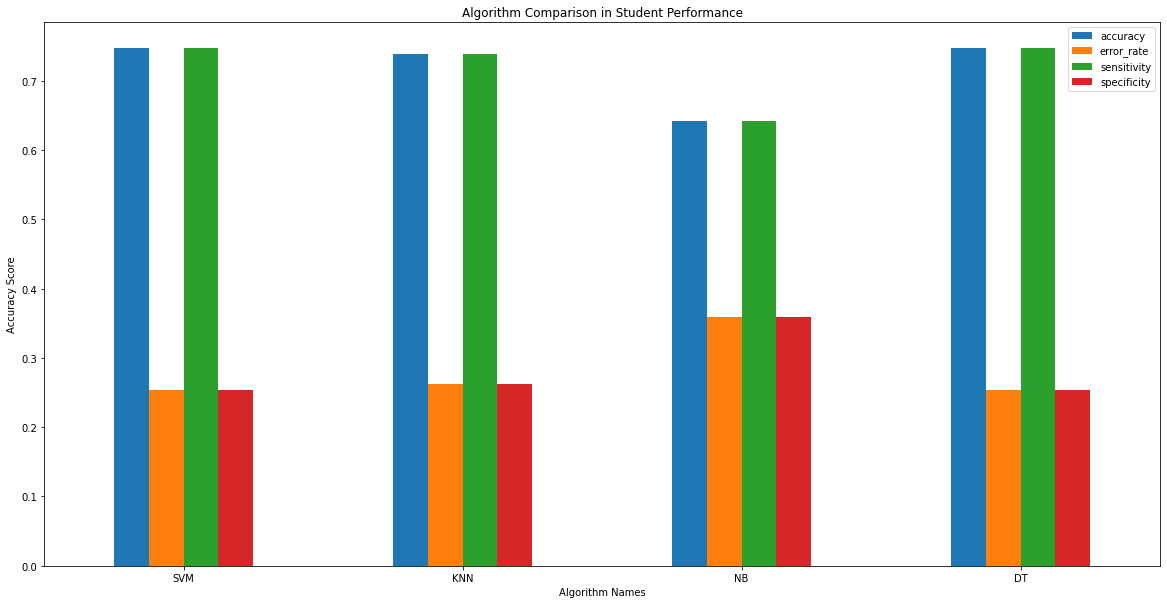

In [52]:
ax = df_model_acc.plot.bar(x='names', rot=0, figsize=(20, 10))

plt.xlabel('Algorithm Names')
plt.ylabel('Accuracy Score')
plt.title('Algorithm Comparison in Student Performance')

plt.show()